# 確率分布

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.rcParams["font.family"] ="IPAexGothic"
N = 100

## ベルヌーイ試行・ベルヌーイ分布

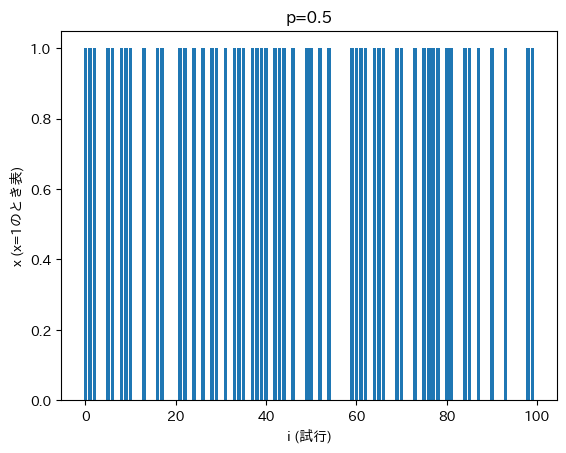

In [2]:
model = stats.bernoulli(p=0.5)

x = np.zeros(N, dtype=int)
for i in range(N):
    x[i] = model.rvs()

plt.bar(np.arange(N), x)
plt.title("p={}".format(model.kwds["p"]))
plt.xlabel("i (試行)")
plt.ylabel("x (x=1のとき表)")
plt.show()

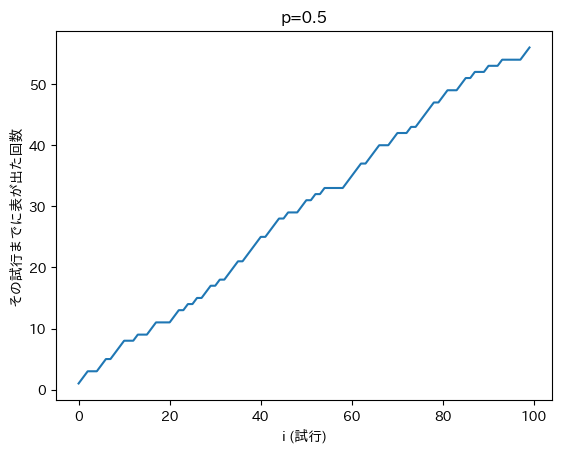

In [3]:
plt.plot(np.arange(N), np.cumsum(x))
plt.title("p={}".format(model.kwds["p"]))
plt.xlabel("i (試行)")
plt.ylabel("その試行までに表が出た回数")
plt.show()

## 二項分布

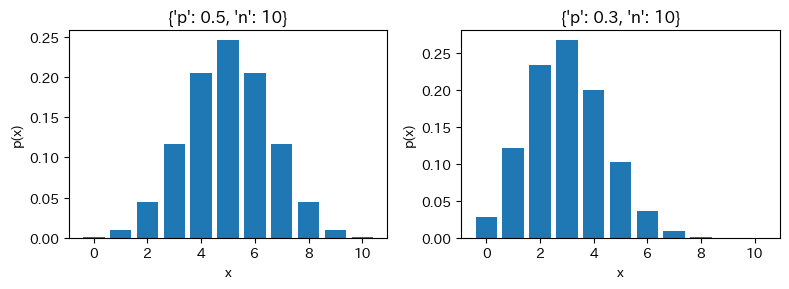

In [4]:
plt.figure(figsize=(8, 3))

n = 10
model = stats.binom(p=0.5, n=n)
plt.subplot(121)
plt.bar(np.arange(n+1), model.pmf(np.arange(n+1)), width=0.8)
plt.title("{}".format(model.kwds))
plt.xlabel("x")
plt.ylabel("p(x)")

n = 10
model = stats.binom(p=0.3, n=n)
plt.subplot(122)
plt.bar(np.arange(n+1), model.pmf(np.arange(n+1)), width=0.8)
plt.title("{}".format(model.kwds))
plt.xlabel("x")
plt.ylabel("p(x)")

plt.tight_layout()
plt.show()

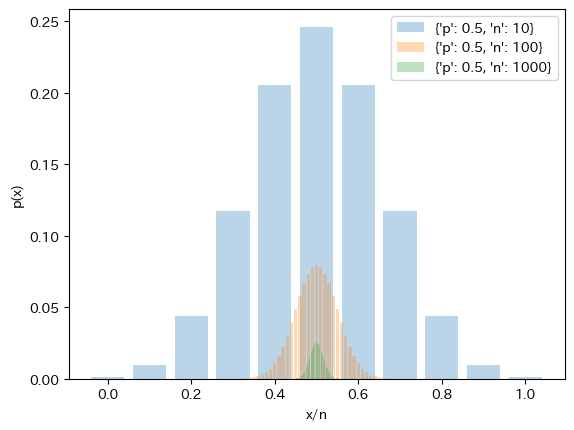

In [5]:
for n in [10, 100, 1000]:
    model = stats.binom(p=0.5, n=n)
    plt.bar(np.arange(n+1)/n, model.pmf(np.arange(n+1)), width=0.8/n, alpha=0.3, label="{}".format(model.kwds))

plt.legend()
plt.xlabel("x/n")
plt.ylabel("p(x)")
plt.show()

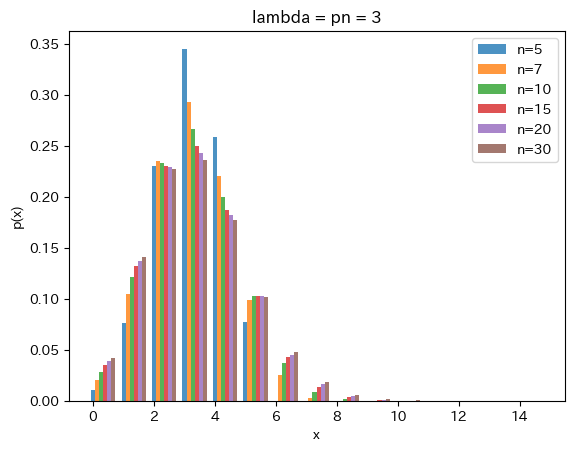

In [6]:
lam = 3
ns = [5, 7, 10, 15, 20, 30]
for i, n in enumerate(ns):
    model = stats.binom(p=lam / n, n=n)
    plt.bar(
        np.arange(lam * 5) + i * 0.8 / len(ns),
        model.pmf(np.arange(lam * 5)),
        width=0.8 / len(ns),
        alpha=0.8,
        label="n={}".format(model.kwds["n"]),
    )

plt.legend()
plt.title("lambda = pn = {}".format(lam))
plt.xlabel("x")
plt.ylabel("p(x)")
plt.show()

## ポアソン分布

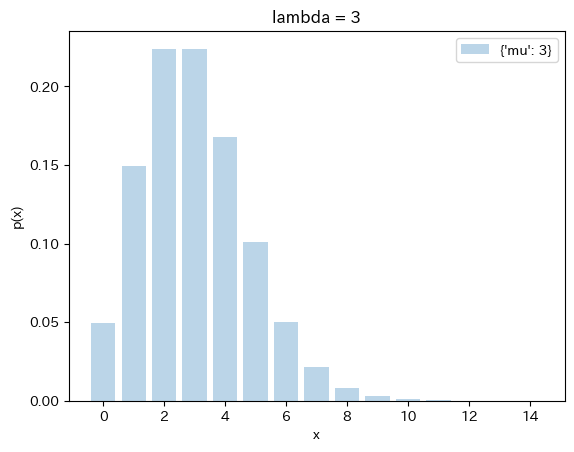

In [7]:
lam = 3
model = stats.poisson(mu=lam)

plt.bar(np.arange(lam*5), model.pmf(np.arange(lam*5)), width=0.8, alpha=0.3, label="{}".format(model.kwds))

plt.legend()
plt.title("lambda = {}".format(lam))
plt.xlabel("x")
plt.ylabel("p(x)")
plt.show()

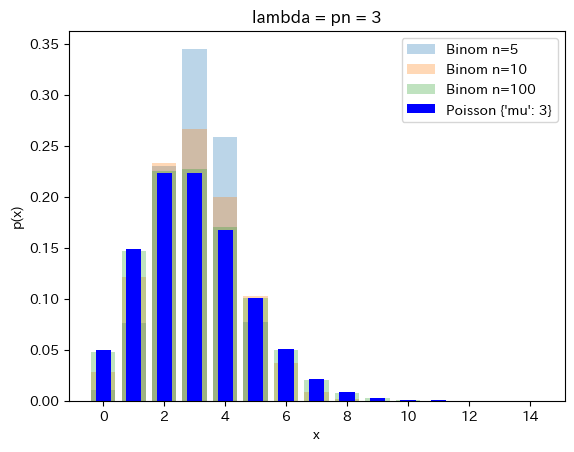

In [8]:
lam = 3
for n in [5, 10, 100]:
    model = stats.binom(p=lam/n, n=n)
    plt.bar(np.arange(lam*5), model.pmf(np.arange(lam*5)), width=0.8, alpha=0.3, label="Binom n={}".format(model.kwds["n"]))

model = stats.poisson(mu=lam)
plt.bar(np.arange(lam*5), model.pmf(np.arange(lam*5)), color="blue", width=0.5, alpha=1, label="Poisson {}".format(model.kwds))

plt.legend()
plt.title("lambda = pn = {}".format(lam))
plt.xlabel("x")
plt.ylabel("p(x)")
plt.show()

## 正規分布

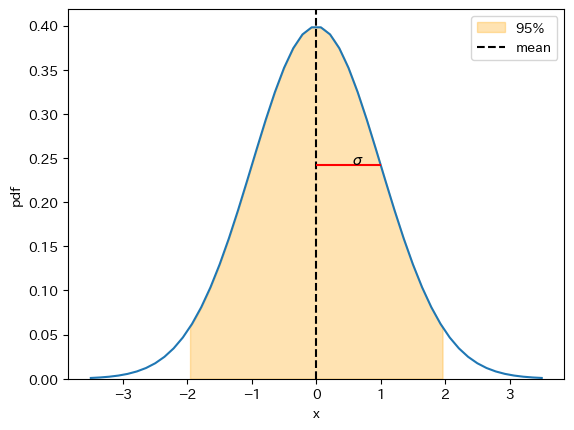

In [9]:
mu = 0.0
s2 = 1.0

model = stats.norm(loc=mu, scale=np.sqrt(s2))

x_lin = np.linspace(mu-1.96*np.sqrt(s2), mu+1.96*np.sqrt(s2))
plt.fill_between(x_lin, 0, model.pdf(x_lin), alpha=0.3, color="orange", label="95%")

x_lin = np.linspace(mu-3.5*np.sqrt(s2), mu+3.5*np.sqrt(s2))
plt.plot(x_lin, model.pdf(x_lin))
plt.axvline(mu, c="k", ls="--", label="mean")

cp = (mu+np.sqrt(s2), model.pdf(mu+np.sqrt(s2)))
plt.hlines(cp[1], mu, cp[0], color="red")
plt.text(mu+0.5*np.sqrt(s2), cp[1], "σ", fontsize="large")

plt.xlabel("x")
plt.ylabel("pdf")
plt.ylim(0, None)
plt.legend()
plt.savefig("img/5normal.svg")
plt.show()


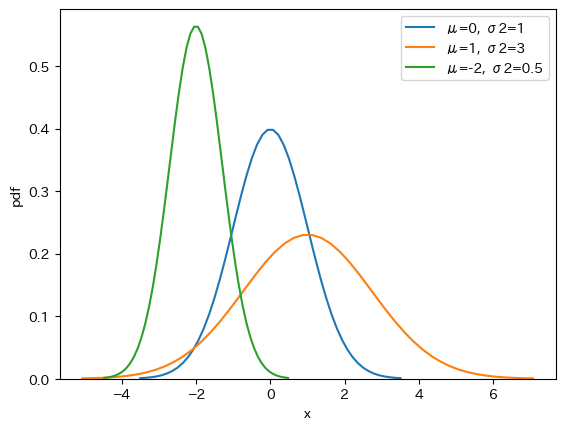

In [10]:
for mu, s2 in zip([0, 1, -2], [1, 3, 0.5]):
    model = stats.norm(loc=mu, scale=np.sqrt(s2))
    x_lin = np.linspace(mu-3.5*np.sqrt(s2), mu+3.5*np.sqrt(s2))
    plt.plot(x_lin, model.pdf(x_lin), label="μ={}, σ2={}".format(mu, s2))

plt.xlabel("x")
plt.ylabel("pdf")
plt.ylim(0, None)
plt.legend()
plt.show()


# 多変量正規分布

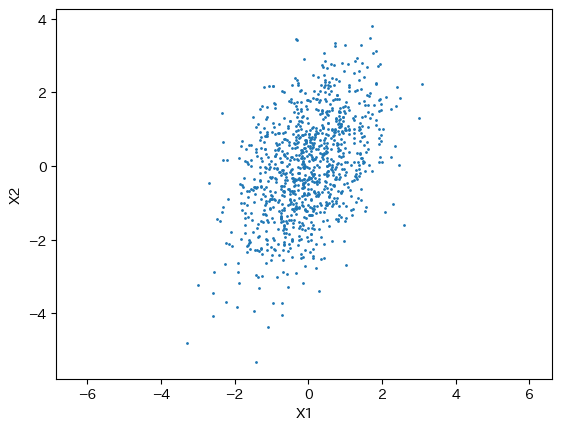

In [11]:
n = 1000
mv_normal = stats.multivariate_normal([0,0], cov=[[1, 0.6],[0.6, 2]])

x = mv_normal.rvs(n, random_state=123)

plt.axis("equal")
plt.scatter(x[:,0], x[:,1], s=1)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

# シミュレーション

In [12]:
x_bar = []

for i in range(1000):
    x = np.random.standard_normal(size=100)
    x_bar.append(np.mean(x))

x_bar

[0.1401060911604234,
 -0.06591916867563591,
 0.13635178337583265,
 -0.07066017474858716,
 -0.09783751701029508,
 0.039610147735529996,
 0.05406447305402086,
 -0.14977088751600648,
 -0.04852394132772203,
 0.10031604469684616,
 -0.26930407697892583,
 -0.12922247889183422,
 0.05869584635515788,
 -0.03135020290726716,
 0.028937484269069568,
 0.02037305206173051,
 0.024314968324331557,
 -0.05952099395773416,
 0.005809787643732551,
 0.0003369740821378747,
 0.05269537843746089,
 0.13994890044689998,
 0.0651861260836952,
 -0.07309574300851515,
 -0.10000124105210499,
 0.06613635875568741,
 -0.03634883686982927,
 0.12491130340730827,
 -0.0615677235640546,
 0.06102763192525872,
 0.02977342513365114,
 -0.014069561804373146,
 0.06515032307551535,
 0.13566987695917043,
 -0.08713238577215686,
 0.25523226456173864,
 0.01406801800953355,
 0.08820587170852758,
 -0.04726055125989953,
 0.09254244761196129,
 -0.013907923526638834,
 0.06498430045322834,
 0.08983600639896902,
 -0.054820745177148036,
 0.07854

-3.0878513509235986e-05
0.01051331094446541


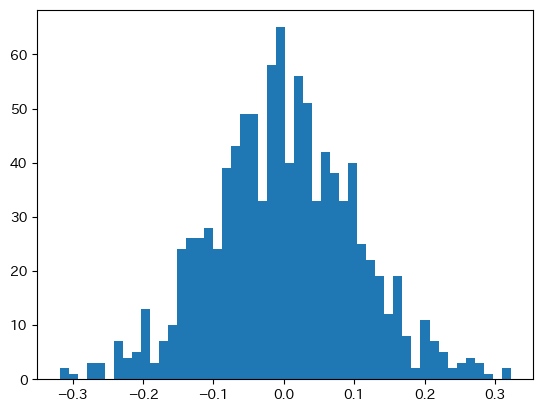

In [13]:
print(np.mean(x_bar))
print(np.var(x_bar))

plt.hist(x_bar, bins=50)
plt.show()

# カイ二乗分布

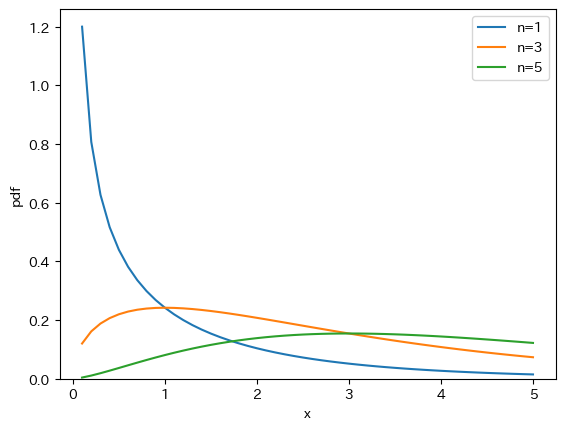

In [14]:
ns = [1, 3, 5]
x_lin = np.linspace(0.1, 5)
for n in ns:
    plt.plot(x_lin, stats.chi2.pdf(x_lin, n), label=f"{n=}")

plt.legend()
plt.xlabel("x")
plt.ylabel("pdf")
plt.ylim(0, None)
plt.show()

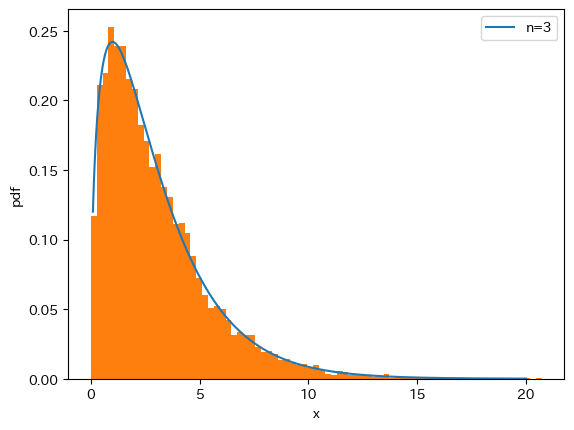

In [15]:
n = 3
x_lin = np.linspace(0.1, 20, num=1000)
plt.plot(x_lin, stats.chi2.pdf(x_lin, n), label=f"{n=}")

W = []
for i in range(10000):
    z = np.random.standard_normal(size=n)
    W.append(np.sum(z**2))

plt.hist(W, density=True, bins="auto")

plt.legend()
plt.xlabel("x")
plt.ylabel("pdf")
plt.ylim(0, None)
plt.show()

# t分布

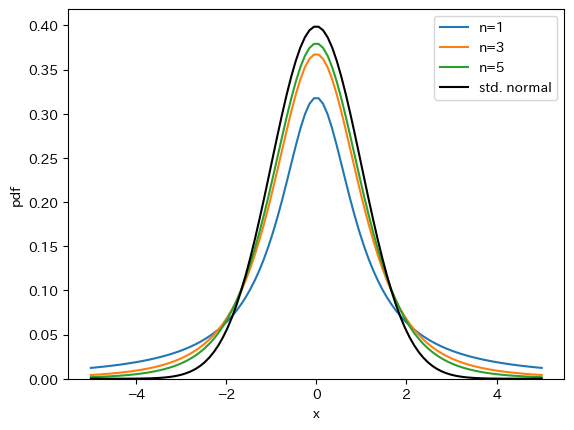

In [16]:
ns = [1, 3, 5]
x_lin = np.linspace(-5, 5, num=100)
for n in ns:
    plt.plot(x_lin, stats.t.pdf(x_lin, n), label=f"{n=}")

plt.plot(x_lin, stats.norm.pdf(x_lin), label="std. normal", c="k")

plt.legend()
plt.xlabel("x")
plt.ylabel("pdf")
plt.ylim(0, None)
plt.show()

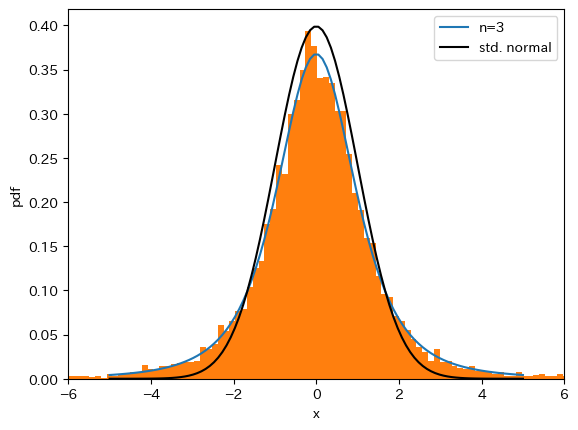

In [17]:
n=3
plt.plot(x_lin, stats.t.pdf(x_lin, n), label=f"{n=}")

t = []
for i in range(10000):
    z = np.random.standard_normal(size=n)
    W = np.sum(z**2)

    z_mean = np.random.standard_normal()
    t.append(z_mean / np.sqrt(W/n))

plt.hist(t, density=True, bins="auto")

plt.plot(x_lin, stats.norm.pdf(x_lin), label="std. normal", c="k")

plt.legend()
plt.xlabel("x")
plt.ylabel("pdf")
plt.xlim(-6, 6)
plt.ylim(0, None)
plt.show()

# F分布

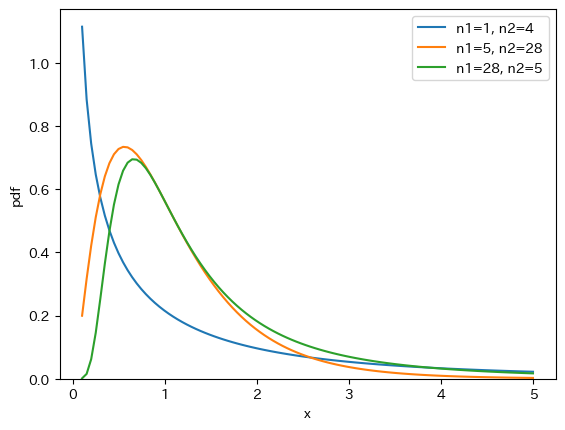

In [18]:
n1s = [1, 5, 28]
n2s = [4, 28, 5]
x_lin = np.linspace(0.1, 5, num=100)
for n1, n2 in zip(n1s, n2s):
    plt.plot(x_lin, stats.f.pdf(x_lin, n1, n2), label=f"{n1=}, {n2=}")


plt.legend()
plt.xlabel("x")
plt.ylabel("pdf")
plt.ylim(0, None)
plt.show()

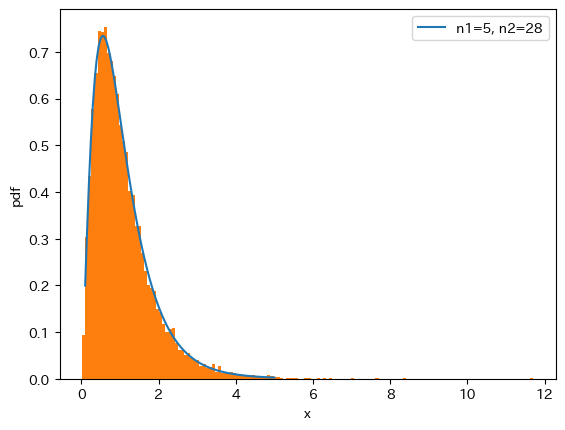

In [19]:
n1 = 5
n2 = 28
plt.plot(x_lin, stats.f.pdf(x_lin, n1, n2), label=f"{n1=}, {n2=}")

F = []
for i in range(10000):
    W1 = np.sum(np.random.standard_normal(size=n1)**2)
    W2 = np.sum(np.random.standard_normal(size=n2)**2)
    F.append((W1/n1)/(W2/n2))

plt.hist(F, density=True, bins="auto")

plt.legend()
plt.xlabel("x")
plt.ylabel("pdf")
plt.ylim(0, None)
plt.show()